# 数组广播机制

In [1]:
import numpy as np

In [2]:
# 正常的加法
a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])
b = np.array([[ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2]])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [3]:
# 将 b 的值变成一维的 [0,1,2] 之后的加法：
b = np.array([0,1,2])
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [4]:
b = np.array([0,1,2])

a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

结果一样，虽然两个数组的维数不一样，但是 Numpy 检测到 b 的维度与 a 的维度匹配，所以将 b 扩展为之前的形式，得到相同的形状。

In [5]:
# 将 a 变成一个列向量
a = np.array([0,10,20,30])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [30]])

In [6]:
b

array([0, 1, 2])

In [7]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Numpy还是根据两者的维度，自动将它们进行扩展然后进行计算。

对于 Numpy 来说，维度匹配当且仅当：

* 维度相同
* 有一个的维度是1

匹配会从最后一维开始进行，直到某一个的维度全部匹配为止，因此对于以下情况，Numpy 都会进行相应的匹配：

A|	B|	Result
--|---|------
`3d array: 256 x 256 x 3`	|`1d array: 3`	|`3d array: 256 x 256 x 3`
`4d array: 8 x 1 x 6 x 1`	|`3d array: 7 x 1 x 5`	|`3d array: 8 x 7 x 6 x 5`
`3d array: 5 x 4 x 3`	|`1d array: 1`	|`3d array: 5 x 4 x 3`
`3d array: 15 x 4 x 13`	|`1d array: 15 x 1 x 13`|	`3d array: 15 x 4 x 13`
`2d array: 4 x 1`	|`1d array: 3`	|`2d array: 4 x 3`

In [8]:
# 维度不匹配，也会报错
a = np.array([0,10,20,30])
a.shape

(4,)

In [9]:
b.shape

(3,)

In [10]:
a+b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [11]:
# 将 a 转换为列向量，还是可以计算出结果：
a[:, np.newaxis] + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## 例子

In [13]:
x = np.linspace(-.5,.5,21)
y = x[:,np.newaxis]

In [14]:
x.shape

(21,)

In [15]:
y.shape

(21, 1)

In [18]:
# 形成一个21*21的网格，再计算网格到原点的距离
radius = np.sqrt(x**2+y**2)

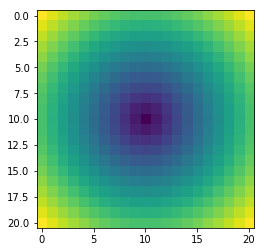

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(radius)